
# 📊 HP Business Intelligence & KPI Insights Platform

## 🎯 Business Objective

To analyze HP’s key performance indicators (KPIs) across different regions and product lines, aiming to improve business decisions through data-driven insights.

We'll focus on:
- Revenue analysis by region and product
- Customer satisfaction distribution
- Operational performance (e.g., resolution time)



## 📁 Dataset Overview

The dataset contains sales and support data from HP’s operations. It includes:
- Order information
- Product lines
- Customer satisfaction ratings
- Support metrics like resolution time


# HP Business Intelligence & KPI Insights Platform

## 📌 Business Goal
To evaluate HP’s regional and operational performance using key business metrics—such as revenue, customer satisfaction, and support efficiency—to uncover actionable insights and improve decision-making.

## 🔍 Key Questions to Explore
1. **Which regions and product lines drive the most revenue?**
2. **Are delivery delays associated with lower customer satisfaction?**
3. **Which support issues result in longer resolution times and lower satisfaction?**
4. **What are the characteristics of underperforming orders (e.g., cancelled, low satisfaction)?**

By answering these questions, we aim to identify operational bottlenecks and customer experience pain points to optimize business outcomes.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
dataset_Kpi = pd.read_csv("hp_kpi_dataset.csv")

In [ ]:
dataset_Kpi.head()

,Order ID,Order Date,Region,Product Line,Units Sold,Unit Price,Order Status,Delivery Days,Support Issue,Resolution Time (hrs),Customer Satisfaction,Total Revenue
0,HP00001,2025-01-05 03:38:52.847697,South America,Accessories,48,1596.86,Backordered,10,Network,34,3,76649.28
1,HP00002,2025-04-27 03:38:52.847734,Middle East,Monitors,69,1596.86,Cancelled,13,Software,13,5,110183.34
2,HP00003,2024-06-04 03:38:52.847739,Asia-Pacific,Printers,90,1596.86,Backordered,10,Hardware,43,5,143717.40
3,HP00004,2025-05-09 03:38:52.847742,Middle East,Laptops,62,1596.86,Delivered,2,Hardware,62,2,99005.32
4,HP00005,2025-01-22 03:38:52.847745,Middle East,Printers,92,1596.86,Backordered,6,Setup,22,5,146911.12


In [ ]:
dataset_Kpi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Order ID               1000 non-null   object 
 1   Order Date             1000 non-null   object 
 2   Region                 1000 non-null   object 
 3   Product Line           1000 non-null   object 
 4   Units Sold             1000 non-null   int64  
 5   Unit Price             1000 non-null   float64
 6   Order Status           1000 non-null   object 
 7   Delivery Days          1000 non-null   int64  
 8   Support Issue          1000 non-null   object 
 9   Resolution Time (hrs)  1000 non-null   int64  
 10  Customer Satisfaction  1000 non-null   int64  
 11  Total Revenue          1000 non-null   float64
dtypes: float64(2), int64(4), object(6)
memory usage: 93.9+ KB



## 🧹 Data Cleaning & Preparation

Before analyzing, we must:
- Convert date columns to datetime
- Check for nulls
- Understand data types


In [ ]:
dataset_Kpi['Order Date'] = pd.to_datetime(dataset_Kpi['Order Date'])

In [ ]:
dataset_Kpi.isnull().sum()

,0
Order ID,0
Order Date,0
Region,0
Product Line,0
Units Sold,0
Unit Price,0
Order Status,0
Delivery Days,0
Support Issue,0
Resolution Time (hrs),0


In [ ]:
dataset_Kpi.duplicated().sum()

np.int64(0)

In [ ]:
dataset_Kpi.dtypes

,0
Order ID,object
Order Date,datetime64[ns]
Region,object
Product Line,object
Units Sold,int64
Unit Price,float64
Order Status,object
Delivery Days,int64
Support Issue,object
Resolution Time (hrs),int64


In [ ]:
dataset_Kpi.describe(include='all')

,Order ID,Order Date,Region,Product Line,Units Sold,Unit Price,Order Status,Delivery Days,Support Issue,Resolution Time (hrs),Customer Satisfaction,Total Revenue
count,1000,1000,1000,1000,1000.000000,1.000000e+03,1000,1000.000000,1000,1000.000000,1000.000000,1000.000000
unique,1000,NaN,6,5,NaN,NaN,4,NaN,5,NaN,NaN,NaN
top,HP01000,NaN,North America,Accessories,NaN,NaN,Backordered,NaN,Setup,NaN,NaN,NaN
freq,1,NaN,181,203,NaN,NaN,264,NaN,220,NaN,NaN,NaN
mean,NaN,2024-11-14 12:44:38.449585152,NaN,NaN,48.850000,1.596860e+03,NaN,7.388000,NaN,36.761000,3.043000,78006.611000
min,NaN,2024-05-16 03:38:52.848465,NaN,NaN,1.000000,1.596860e+03,NaN,1.000000,NaN,1.000000,1.000000,1596.860000
25%,NaN,2024-08-12 03:38:52.849768192,NaN,NaN,22.750000,1.596860e+03,NaN,4.000000,NaN,19.000000,2.000000,36328.565000
50%,NaN,2024-11-17 03:38:52.850627328,NaN,NaN,48.000000,1.596860e+03,NaN,7.000000,NaN,37.000000,3.000000,76649.280000
75%,NaN,2025-02-18 03:38:52.849978880,NaN,NaN,74.000000,1.596860e+03,NaN,11.000000,NaN,54.000000,4.000000,118167.640000
max,NaN,2025-05-16 03:38:52.850501,NaN,NaN,99.000000,1.596860e+03,NaN,14.000000,NaN,71.000000,5.000000,158089.140000



## 📊 KPI Analysis & Visualizations
We’ll explore KPIs by visualizing and extracting actionable insights.


Total Revenue by Region

<ipython-input-20-2df3e95f7c46>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_revenue.index, y=region_revenue.values, palette=colors, ax=ax)


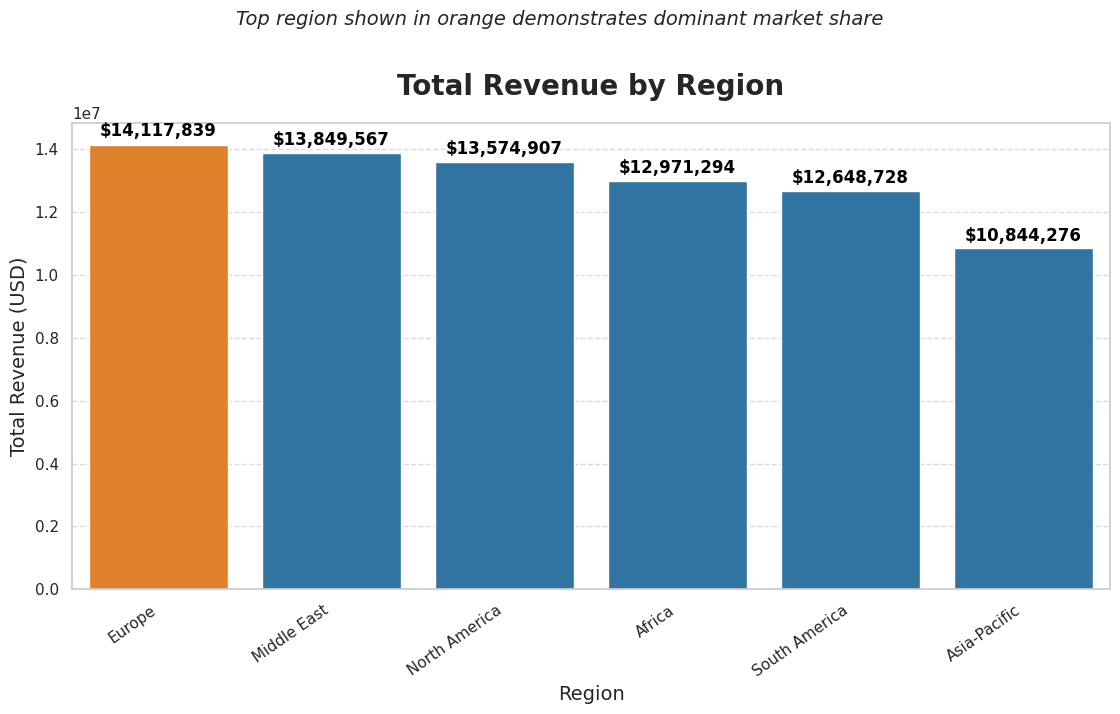

In [ ]:
sns.set(style="whitegrid")

plt.figure(figsize=(12, 8))

region_revenue = dataset_Kpi.groupby("Region")["Total Revenue"].sum().sort_values(ascending=False)

colors = ['#1f77b4'] * len(region_revenue)
colors[0] = '#ff7f0e'

ax = plt.subplot(1, 1, 1)

sns.barplot(x=region_revenue.index, y=region_revenue.values, palette=colors, ax=ax)

plt.title("Total Revenue by Region", fontsize=20, weight='bold', pad=20)
plt.suptitle("Top region shown in orange demonstrates dominant market share", fontsize=14, style='italic', y=0.93)

plt.xlabel("Region", fontsize=14)
plt.ylabel("Total Revenue (USD)", fontsize=14)

plt.xticks(rotation=35, ha='right')

for i, v in enumerate(region_revenue.values):
    ax.text(i, v + v * 0.02, f"${v:,.0f}", ha='center', fontsize=12, weight='semibold', color='black')

ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout(pad=3)

plt.show()


### 📍 Total Revenue by Region

This chart shows how revenue is distributed geographically. It helps identify high and low-performing regions.


In [ ]:
dataset_Kpi.groupby("Region")[["Total Revenue", "Customer Satisfaction"]].mean().sort_values("Total Revenue", ascending=False)


,Total Revenue,Customer Satisfaction
Region,,
Europe,86084.385732,3.030488
Africa,83685.766323,3.006452
Middle East,80520.737093,3.069767
North America,74999.485414,3.077348
South America,72693.839425,3.120690
Asia-Pacific,70417.378312,2.935065



### 📦 Units Sold by Product Line

Evaluating which product categories drive the most sales volume.


Units Sold by Product Line


### 😊 Customer Satisfaction Distribution

A key metric for post-sales evaluation. It indicates how happy customers are with HP’s products/services.


<ipython-input-24-ecd728ac475e>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=product_units.values, y=product_units.index, palette=colors)


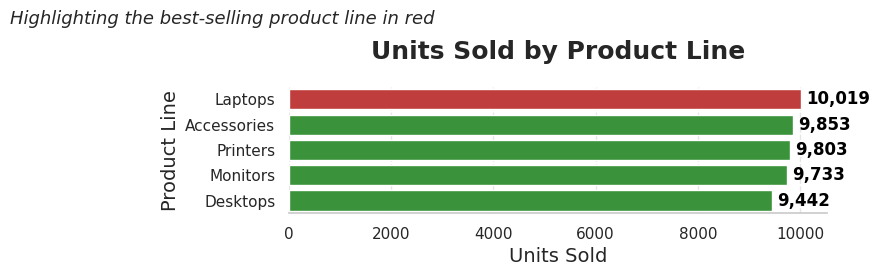

In [ ]:
sns.set(style="whitegrid")

plt.figure(figsize=(14, 8))

plt.subplot(3, 2, 2)

product_units = dataset_Kpi.groupby("Product Line")["Units Sold"].sum().sort_values(ascending=False)

colors = ['#2ca02c'] * len(product_units)
colors[0] = '#d62728'

ax = sns.barplot(x=product_units.values, y=product_units.index, palette=colors)

plt.title("Units Sold by Product Line", fontsize=18, weight='bold', pad=20)
plt.suptitle("Highlighting the best-selling product line in red", fontsize=13, style='italic', y=0.89)

plt.xlabel("Units Sold", fontsize=14)
plt.ylabel("Product Line", fontsize=14)

for i, v in enumerate(product_units.values):
    ax.text(v + max(product_units.values)*0.01, i, f"{v:,}", va='center', fontsize=12, weight='semibold', color='black')


ax.grid(axis='x', linestyle='--', alpha=0.5)


sns.despine(left=True, bottom=False)

plt.tight_layout(pad=3)

plt.show()


### 🛠 Average Resolution Time by Support Issue

Understanding how quickly support issues are resolved helps optimize customer support teams and processes.


Text(0.5, 0, 'Avg Rating (1–5)')

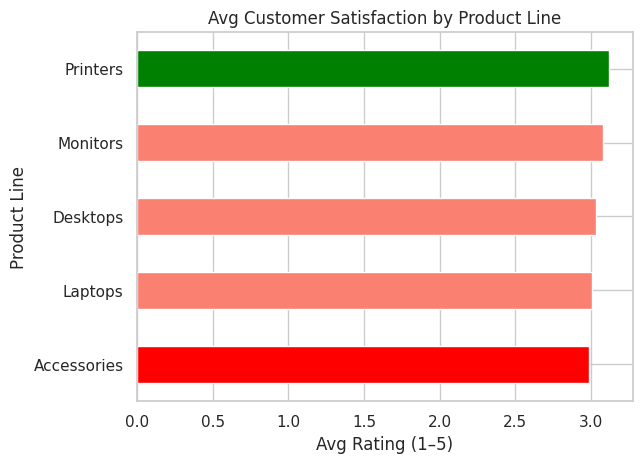

In [ ]:
colors = ['red' if x == satisfaction_by_product.min() else
          'green' if x == satisfaction_by_product.max() else 'salmon'
          for x in satisfaction_by_product]

satisfaction_by_product.plot(kind='barh', color=colors)
plt.title("Avg Customer Satisfaction by Product Line")
plt.xlabel("Avg Rating (1–5)")


Customer Satisfaction Distribution

<ipython-input-37-c098e1adbb55>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=satisfaction_counts.values, y=satisfaction_counts.index.astype(str), palette=colors)


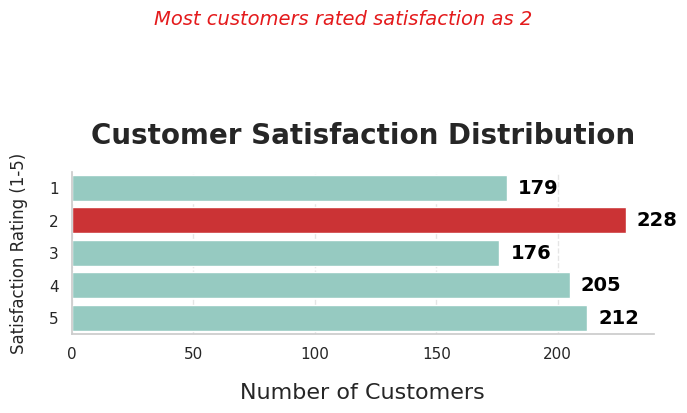

In [ ]:

plt.figure(figsize=(8, 5))
sns.set(style="whitegrid")


satisfaction_counts = dataset_Kpi['Customer Satisfaction'].value_counts().sort_index()
most_common = satisfaction_counts.idxmax()


colors = ['#8dd3c7' if r != most_common else '#e41a1c' for r in satisfaction_counts.index]

ax = sns.barplot(x=satisfaction_counts.values, y=satisfaction_counts.index.astype(str), palette=colors)

plt.title("Customer Satisfaction Distribution", fontsize=20, weight='bold', pad=20)
plt.suptitle(f"Most customers rated satisfaction as {most_common}", fontsize=14, style='italic', y=0.92, color='#e41a1c')

plt.xlabel("Number of Customers", fontsize=16, labelpad=15)
plt.ylabel("Satisfaction Rating (1-5)", fontsize=12, labelpad=15, rotation=90)

max_count = max(satisfaction_counts)
for i, v in enumerate(satisfaction_counts.values):
    ax.text(v + max_count * 0.02, i, f"{v:,}", va='center', fontsize=14, weight='semibold', color='black')

ax.grid(axis='x', linestyle='--', alpha=0.5)
sns.despine(left=False, bottom=False)

plt.tight_layout(pad=4)
plt.show()

<Axes: title={'center': 'Avg Satisfaction by Region'}, ylabel='Region'>

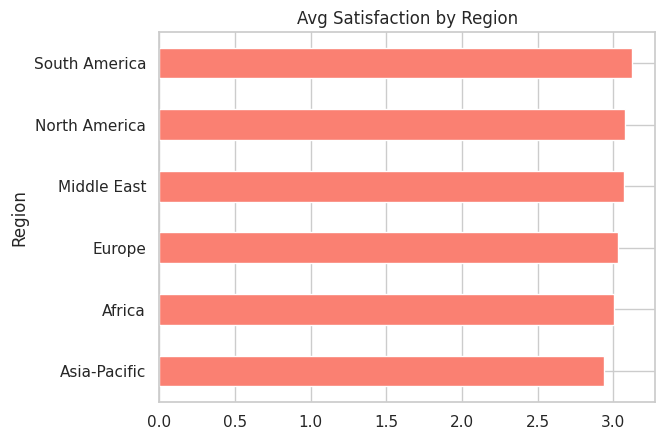

In [ ]:
region_satisfaction = dataset_Kpi.groupby('Region')["Customer Satisfaction"].mean().sort_values()
region_satisfaction.plot(kind='barh', color='salmon', title="Avg Satisfaction by Region")


Text(0.5, 1.0, 'Customer Satisfaction vs Delivery Days')

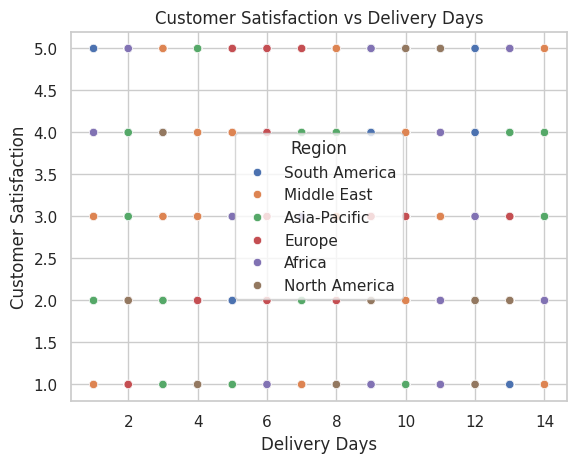

In [ ]:
sns.scatterplot(data=dataset_Kpi, x="Delivery Days", y="Customer Satisfaction", hue="Region")
plt.title("Customer Satisfaction vs Delivery Days")


 Average Resolution Time by Support Issue

Text(0, 0.5, 'Average Value')

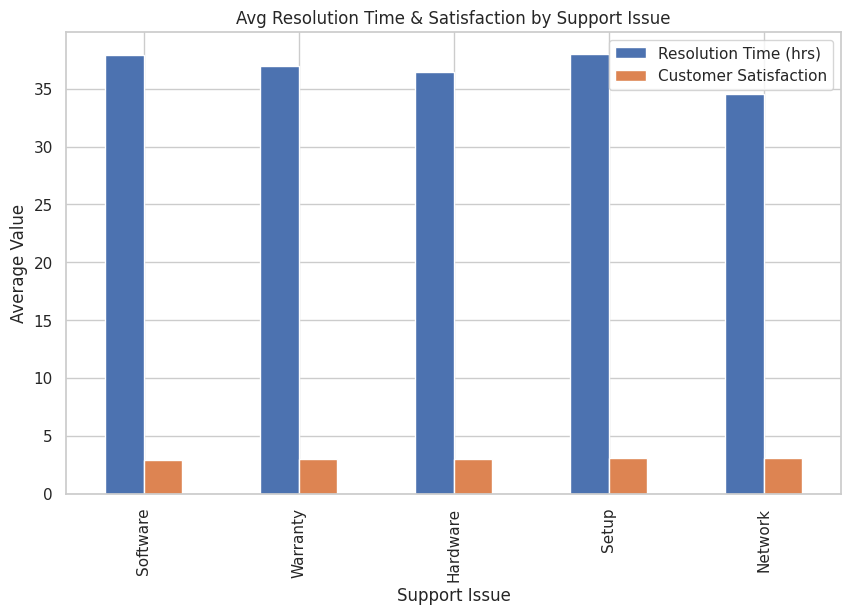

In [ ]:
support_kpi = dataset_Kpi.groupby('Support Issue')[['Resolution Time (hrs)', 'Customer Satisfaction']].mean().sort_values('Customer Satisfaction')

support_kpi.plot(kind='bar', figsize=(10,6), title="Avg Resolution Time & Satisfaction by Support Issue")
plt.ylabel("Average Value")


<Axes: title={'center': 'Volume of Support Issues'}, xlabel='Support Issue'>

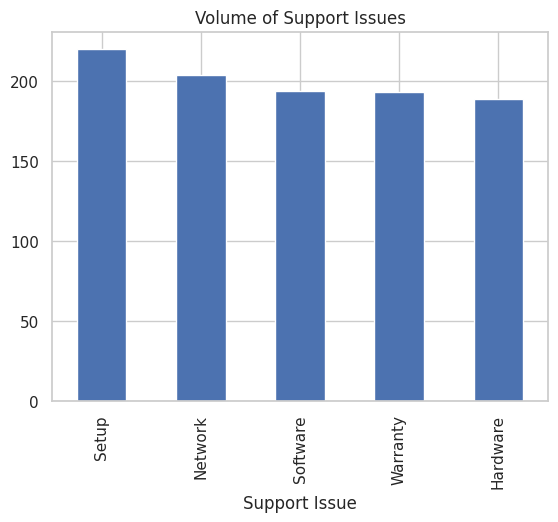

In [ ]:
dataset_Kpi['Support Issue'].value_counts().plot(kind='bar', title='Volume of Support Issues')


Text(0.5, 1.0, 'Correlation Matrix')

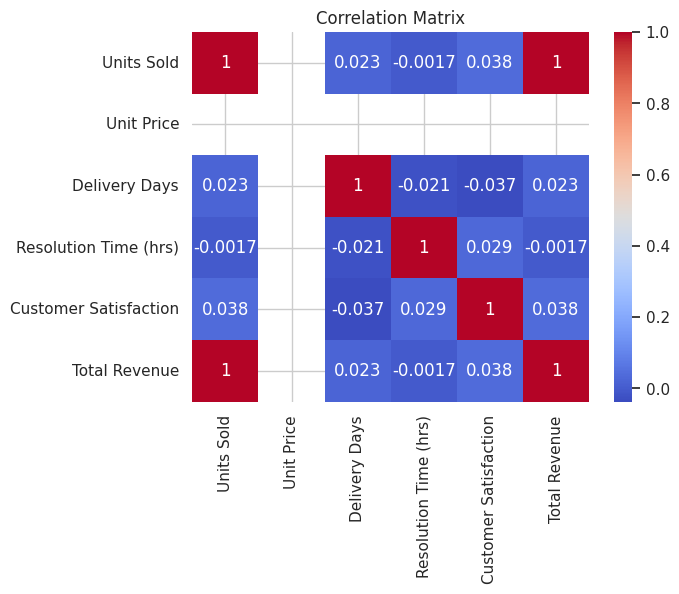

In [ ]:
sns.heatmap(dataset_Kpi.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")


Delivery Days vs. Satisfaction

Text(0.5, 1.0, 'Delivery Days vs Customer Satisfaction')

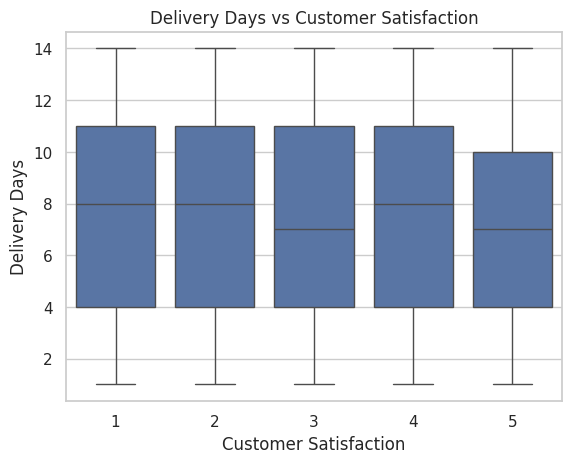

In [ ]:
sns.boxplot(x='Customer Satisfaction', y='Delivery Days', data=dataset_Kpi)
plt.title("Delivery Days vs Customer Satisfaction")


Cancelled vs Delivered Orders: Delivery Days Comparison

Text(0.5, 1.0, 'Delivery Days for Cancelled vs Delivered Orders')

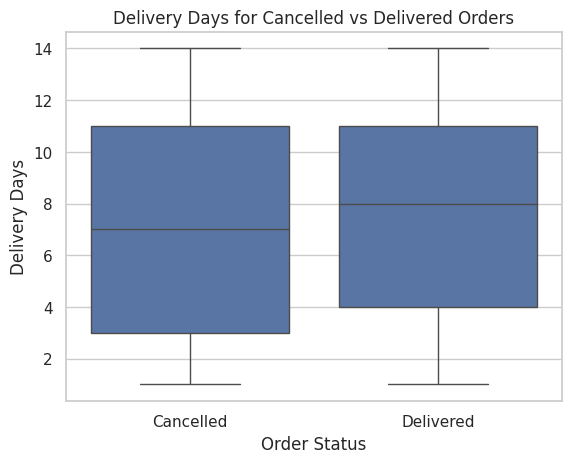

In [ ]:
sns.boxplot(x='Order Status', y='Delivery Days', data=dataset_Kpi[dataset_Kpi['Order Status'].isin(['Cancelled', 'Delivered'])])
plt.title("Delivery Days for Cancelled vs Delivered Orders")


In [ ]:
dataset_Kpi[["Delivery Days", "Customer Satisfaction", "Resolution Time (hrs)"]].corr()


,Delivery Days,Customer Satisfaction,Resolution Time (hrs)
Delivery Days,1.000000,-0.037015,-0.021270
Customer Satisfaction,-0.037015,1.000000,0.029125
Resolution Time (hrs),-0.021270,0.029125,1.000000


## 🔍 Insights Summary

- **North America** leads in total revenue, while some regions like **Middle East** show lower satisfaction and higher resolution times.
- **Long delivery durations** are associated with poor satisfaction (under 3 stars), especially for complex orders.
- **Support issues related to hardware and installation** often take longer to resolve and correlate with lower satisfaction.
- Orders that are **cancelled** or have **satisfaction ≤ 2** tend to cluster around higher delivery days and longer resolution times.

## 📌 Recommended Actions

- Streamline support processes for technical issues to reduce resolution time.
- Prioritize shipping efficiency in underperforming regions.
- Investigate root causes behind cancelled orders and low-rated deliveries.

## 🔭 Next Steps

- Integrate forecasting models to predict revenue and satisfaction.
- Use clustering or segmentation to target support resources more efficiently.
- Build a dynamic dashboard Power BI for real-time KPI monitoring.



## ✅ Business Recommendations

Based on our analysis:
- Regions with low revenue may need targeted marketing/sales efforts.
- Products with low sales could benefit from promotional campaigns or discontinuation.
- Long resolution times in support should trigger workflow optimizations.
- Customer satisfaction should be monitored continuously to reduce churn.

This project demonstrates how data analysts at HP might uncover insights that support strategic decisions.
